# Assignment 1 - Project 13 - Diabetes Prediction
## Simone Tarenzi

## Importing the data

In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

diabetes = pd.read_csv('diabetes.csv')
diabetes.columns.values[2] = "Blood Pressure"
diabetes.columns.values[3] = "Skin Thickness"
diabetes.columns.values[6] = "Diabetes Pedigree Function"

In [122]:
diabetes

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [123]:
diabetes.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 769 non-null    int64  
 1   Glucose                     769 non-null    int64  
 2   Blood Pressure              769 non-null    int64  
 3   Skin Thickness              769 non-null    int64  
 4   Insulin                     769 non-null    int64  
 5   BMI                         769 non-null    float64
 6   Diabetes Pedigree Function  769 non-null    float64
 7   Age                         769 non-null    int64  
 8   Outcome                     769 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.2 KB


In [124]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,769.0,3.840052,3.370237,0.000,1.000,3.000,6.000,17.00
Glucose,769.0,120.897269,31.951886,0.000,99.000,117.000,140.000,199.00
Blood Pressure,769.0,69.115735,19.345296,0.000,62.000,72.000,80.000,122.00
Skin Thickness,769.0,20.509753,15.959020,0.000,0.000,23.000,32.000,99.00
Insulin,769.0,79.697009,115.203999,0.000,0.000,29.000,127.000,846.00
BMI,769.0,31.998179,7.880557,0.000,27.300,32.000,36.600,67.10
Diabetes Pedigree Function,769.0,0.471590,0.331208,0.078,0.244,0.371,0.626,2.42
Age,769.0,33.269181,11.778737,21.000,24.000,29.000,41.000,81.00
Outcome,769.0,0.349805,0.477219,0.000,0.000,0.000,1.000,1.00


# Data Description

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

The diabetes dataset is a widely used dataset in machine learning and healthcare research, and it's originally from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains various attributes such as age, body mass index (BMI), blood pressure, and glucose levels, among others, of patients diagnosed with or at risk of diabetes. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. The dataset is commonly employed for tasks like predictive modeling to determine the likelihood of an individual developing diabetes based on their characteristics. Researchers and data scientists utilize this dataset to develop and validate algorithms for early detection, risk assessment, and personalized treatment strategies for diabetes management.

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration at 2 hours after eating in an oral glucose tolerance test (mg/dL)
* Blood Pressure: Diastolic blood pressure (mmHg)
* Skin Thickness: Triceps skin fold thickness (mm)
* Insulin: 2-hour serum insulin (μU/ml)
* BMI: Body mass index (weight in kg/(height in m)$^2$)
* Diabetes Pedigree Function: Calculates diabetes likelihood depending on the subject's age and on diabetic family history
* Age: Age in years
* Outcome: 1 for diabetic, 0 for non-diabetic

## Age

Min Age: 21 years
Max Age: 81 years
Standard Deviation: 11.78


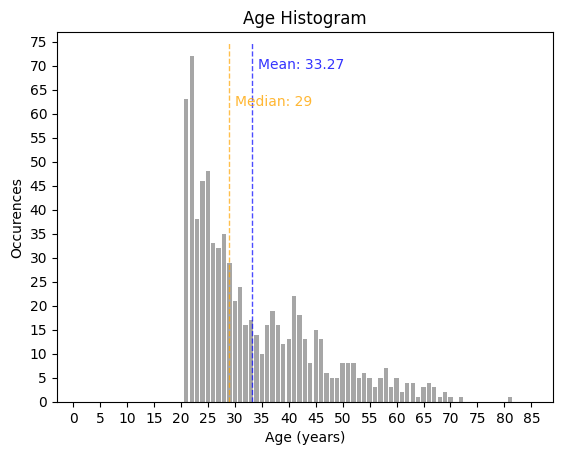

In [125]:
# get minimum and maximum age
min_age = diabetes['Age'].min()
max_age = diabetes['Age'].max()
print('Min Age: {:.0f} years'.format(min_age))
print('Max Age: {:.0f} years'.format(max_age))

# calculate average age
average_age = diabetes['Age'].mean()
median_age = diabetes['Age'].median()

# calculate standard deviation
std_age = diabetes['Age'].std()
print('Standard Deviation: {:.2f}'.format(std_age))

# show histogram of age
counts, bins, patches = plt.hist(diabetes['Age'], bins=range(0, max_age + 2), align='left', rwidth=0.8, color='gray', alpha=0.7)
plt.xticks(range(0, max_age + 5, 5))
plt.xlim([0 - 3, max_age + 8])
plt.ylim([0, counts.max() + 5])
plt.locator_params(axis='y', nbins=20)

# show mean and median on histogram
plt.vlines(average_age, 0, plt.ylim()[1] * 0.97, colors='blue', linestyles='dashed', linewidth=1, alpha=0.7)
plt.text(average_age + 1, plt.ylim()[1] * 0.9, 'Mean: {:.2f}'.format(average_age), color='blue', alpha=0.8)
plt.vlines(median_age, 0, plt.ylim()[1] * 0.97, colors='orange', linestyles='dashed', linewidth=1, alpha=0.7)
plt.text(median_age + 1, plt.ylim()[1] * 0.8, 'Median: {:.0f}'.format(median_age), color='orange', alpha=0.8)

plt.title('Age Histogram')
plt.xlabel('Age (years)')
plt.ylabel('Occurences')
plt.show()

## Pregnancies

Max Pregnancies: 17
Standard Deviation: 3.37


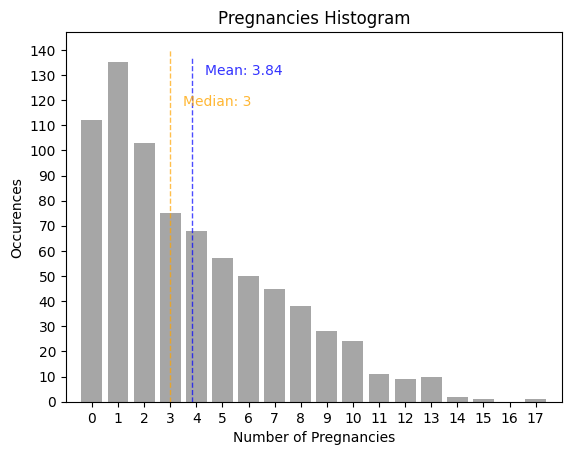

Percentage of Pregnancies over 3: 44.73%


In [126]:
# get maximum number of pregnancies
max_pregnancies = diabetes['Pregnancies'].max()
print('Max Pregnancies: {:.0f}'.format(max_pregnancies))

# calculate average number of pregnancies
average_pregnancies = diabetes['Pregnancies'].mean()
median_pregnancies = diabetes['Pregnancies'].median()

# calculate standard deviation
std_pregnancies = diabetes['Pregnancies'].std()
print('Standard Deviation: {:.2f}'.format(std_pregnancies))

# show histogram of pregnancies
plt.hist(diabetes['Pregnancies'], bins=range(0, max_pregnancies + 2), align='left', rwidth=0.8, color='gray', alpha=0.7)
plt.xticks(range(0, max_pregnancies + 1))
plt.xlim([-1, max_pregnancies + 1])
plt.locator_params(axis='y', nbins=20)

# show mean on histogram
plt.vlines(average_pregnancies, 0, plt.ylim()[1] * 0.97, colors='blue', linestyles='dashed', linewidth=1, alpha=0.7)
plt.text(average_pregnancies + 0.5, plt.ylim()[1] * 0.9, 'Mean: {:.2f}'.format(average_pregnancies), color='blue', alpha=0.8)

# show median on histogram
plt.vlines(median_pregnancies, 0, plt.ylim()[1] * 0.97, colors='orange', linestyles='dashed', linewidth=1, alpha=0.7)
plt.text(median_pregnancies + 0.5, plt.ylim()[1] * 0.8, 'Median: {:.0f}'.format(median_pregnancies), color='orange', alpha=0.8)

plt.title('Pregnancies Histogram')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Occurences')
plt.show()

# percentage of pregnancies over 3
pregnancies_over_3 = diabetes[diabetes['Pregnancies'] > 3].shape[0]
total_pregnancies = diabetes.shape[0]
percentage = (pregnancies_over_3 / total_pregnancies) * 100
print('Percentage of Pregnancies over 3: {:.2f}%'.format(percentage))

## Glucose Level

Glucose level range classification taken from:
* https://www.lark.com/resources/blood-sugar-chart
* https://www.verywellhealth.com/blood-sugar-levels-after-eating-5118330

Min Glucose Level: 44 mg/dL
Max Glucose Level: 199 mg/dL
Standard Deviation: 30.52 mg/dL


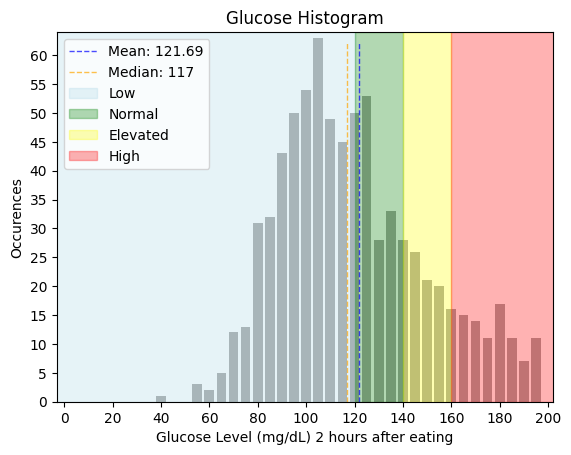

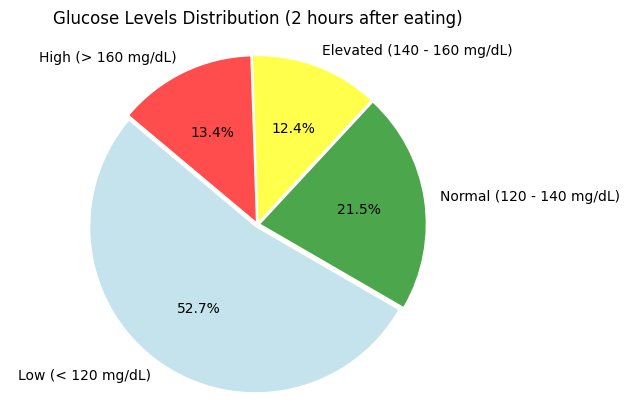

In [127]:
# filter out rows where glucose is 0
diabetes_filtered_glucose = diabetes[diabetes['Glucose'] != 0]

# get minimum and maximum glucose levels
min_glucose = diabetes_filtered_glucose['Glucose'].min()
max_glucose = diabetes_filtered_glucose['Glucose'].max()
print('Min Glucose Level: {:.0f} mg/dL'.format(min_glucose))
print('Max Glucose Level: {:.0f} mg/dL'.format(max_glucose))

# calculate average glucose level
average_glucose = diabetes_filtered_glucose['Glucose'].mean()
median_glucose = diabetes_filtered_glucose['Glucose'].median()

# calculate standard deviation
std_glucose = diabetes_filtered_glucose['Glucose'].std()
print('Standard Deviation: {:.2f} mg/dL'.format(std_glucose))

# show histogram of glucose levels
counts, bins, patches = plt.hist(diabetes_filtered_glucose['Glucose'], bins=range(0, max_glucose + 2, 5), align='left', rwidth=0.8, color='gray', alpha=0.7)
plt.xticks(range(0, max_glucose + 2, 20))
plt.xlim([0 - 3, max_glucose + 3])
plt.ylim([0, counts.max() + 1])
plt.locator_params(axis='y', nbins=20)

# show mean on histogram
plt.vlines(average_glucose, 0, plt.ylim()[1] * 0.97, colors='blue', linestyles='dashed', linewidth=1, alpha=0.7)

# show median on histogram
plt.vlines(median_glucose, 0, plt.ylim()[1] * 0.97, colors='orange', linestyles='dashed', linewidth=1, alpha=0.7)

# define glucose level ranges (2 hours after eating)
normal_lower_bound = 120
normal_upper_bound = 140
elevated_lower_bound = 140
elevated_upper_bound = 160
high_lower_bound = 160
high_upper_bound = 300

# show the ranges on the histogram
plt.fill_betweenx([0, plt.ylim()[1]], -10, normal_lower_bound, color='lightblue', alpha=0.3)
plt.fill_betweenx([0, plt.ylim()[1]], normal_lower_bound, normal_upper_bound, color='green', alpha=0.3)
plt.fill_betweenx([0, plt.ylim()[1]], elevated_lower_bound, elevated_upper_bound, color='yellow', alpha=0.3)
plt.fill_betweenx([0, plt.ylim()[1]], high_lower_bound, high_upper_bound, color='red', alpha=0.3)
plt.legend(['Mean: ' + "{:.2f}".format(average_glucose), 'Median: ' + "{:.0f}".format(median_glucose), 'Low', 'Normal', 'Elevated', 'High'], loc='upper left')

plt.title('Glucose Histogram')
plt.xlabel('Glucose Level (mg/dL) 2 hours after eating')
plt.ylabel('Occurences')
plt.show()

# count the number of people in the glucose level ranges
low = len(diabetes_filtered_glucose[diabetes_filtered_glucose['Glucose'] < normal_lower_bound])
normal = len(diabetes_filtered_glucose[(diabetes_filtered_glucose['Glucose'] >= normal_lower_bound) & (diabetes_filtered_glucose['Glucose'] < normal_upper_bound)])
elevated = len(diabetes_filtered_glucose[(diabetes_filtered_glucose['Glucose'] >= elevated_lower_bound) & (diabetes_filtered_glucose['Glucose'] < elevated_upper_bound)])
high = len(diabetes_filtered_glucose[(diabetes_filtered_glucose['Glucose'] >= high_lower_bound) & (diabetes_filtered_glucose['Glucose'] < high_upper_bound)])

# glucose level pie chart
labels = ['Low (< {} mg/dL)'.format(normal_lower_bound),
          'Normal ({} - {} mg/dL)'.format(normal_lower_bound, normal_upper_bound),
          'Elevated ({} - {} mg/dL)'.format(elevated_lower_bound, elevated_upper_bound),
          'High (> {} mg/dL)'.format(high_lower_bound)]
sizes = [low, normal, elevated, high]
colors = [mcolors.to_rgba('lightblue', alpha=0.7), mcolors.to_rgba('green', alpha=0.7), mcolors.to_rgba('yellow', alpha=0.7), mcolors.to_rgba('red', alpha=0.7)]
explode = (0.02, 0.02, 0.02, 0.02)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.axis('equal')
plt.title('Glucose Levels Distribution (2 hours after eating)', y=1.02)
plt.show()

## Blood Pressure

Blood pressure range classification taken from:
* https://www.cdc.gov/bloodpressure/about.htm
* https://www.singlecare.com/blog/blood-pressure-levels/
* https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings
* https://www.webmd.com/hypertension-high-blood-pressure/diastolic-and-systolic-blood-pressure-know-your-numbers

Min Blood Pressure: 24 mmHg
Max Blood Pressure: 122 mmHg
Standard Deviation: 12.37 mmHg


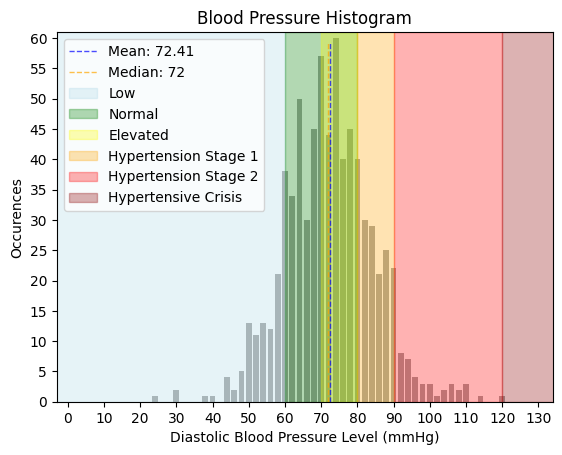

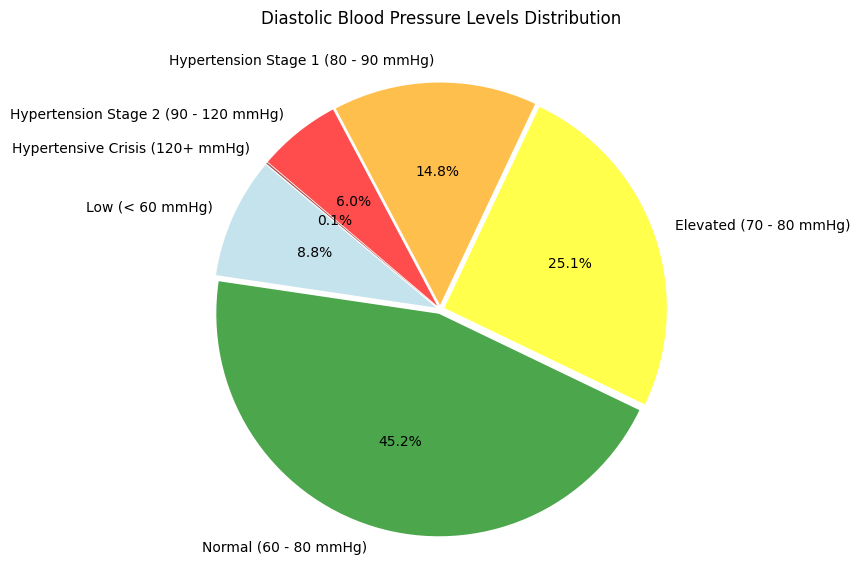

In [128]:
# filter out rows where blood pressure is 0
diabetes_filtered_blood_pressure = diabetes[diabetes['Blood Pressure'] != 0]

# get minimum and maximum blood pressure
min_blood_pressure = diabetes_filtered_blood_pressure['Blood Pressure'].min()
max_blood_pressure = diabetes_filtered_blood_pressure['Blood Pressure'].max()
print('Min Blood Pressure: {:.0f} mmHg'.format(min_blood_pressure))
print('Max Blood Pressure: {:.0f} mmHg'.format(max_blood_pressure))

# calculate average blood pressure
average_blood_pressure = diabetes_filtered_blood_pressure['Blood Pressure'].mean()
median_blood_pressure = diabetes_filtered_blood_pressure['Blood Pressure'].median()

# calculate standard deviation
std_blood_pressure = diabetes_filtered_blood_pressure['Blood Pressure'].std()
print('Standard Deviation: {:.2f} mmHg'.format(std_blood_pressure))

# show histogram of blood pressure
counts, bins, patches = plt.hist(diabetes_filtered_blood_pressure['Blood Pressure'], bins=range(0, max_blood_pressure + 2, 2), align='left', rwidth=0.8, color='gray', alpha=0.7)
plt.xticks(range(0, max_blood_pressure + 10, 10))
plt.xlim([0 - 3, max_blood_pressure + 12])
plt.ylim([0, counts.max() + 1])
plt.locator_params(axis='y', nbins=20)

# show mean on histogram
plt.vlines(average_blood_pressure, 0, plt.ylim()[1] * 0.97, colors='blue', linestyles='dashed', linewidth=1, alpha=0.7)

# show median on histogram
plt.vlines(median_blood_pressure, 0, plt.ylim()[1] * 0.97, colors='orange', linestyles='dashed', linewidth=1, alpha=0.7)

# define blood pressure ranges
low_upper_bound = 60
normal_lower_bound = 60
normal_upper_bound = 80
elevated_lower_bound = 70
elevated_upper_bound = 80
hypertension1_lower_bound = 80
hypertension1_upper_bound = 90
hypertension2_lower_bound = 90
hypertension2_upper_bound = 120
hypertensive_crisis_lower_bound = 120

# show the ranges on the histogram
plt.fill_betweenx([0, plt.ylim()[1]], -10, low_upper_bound, color='lightblue', alpha=0.3)
plt.fill_betweenx([0, plt.ylim()[1]], normal_lower_bound, normal_upper_bound, color='green', alpha=0.3)
plt.fill_betweenx([0, plt.ylim()[1]], elevated_lower_bound, elevated_upper_bound, color='yellow', alpha=0.3)
plt.fill_betweenx([0, plt.ylim()[1]], hypertension1_lower_bound, hypertension1_upper_bound, color='orange', alpha=0.3)
plt.fill_betweenx([0, plt.ylim()[1]], hypertension2_lower_bound, hypertension2_upper_bound, color='red', alpha=0.3)
plt.fill_betweenx([0, plt.ylim()[1]], hypertensive_crisis_lower_bound, 300, color='darkred', alpha=0.3)
plt.legend(['Mean: ' + "{:.2f}".format(average_blood_pressure), 'Median: ' + "{:.0f}".format(median_blood_pressure), 'Low', 'Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2', 'Hypertensive Crisis'], loc='upper left')

plt.title('Blood Pressure Histogram')
plt.xlabel('Diastolic Blood Pressure Level (mmHg)')
plt.ylabel('Occurences')
plt.show()

# count the number of people in the blood pressure ranges
low = diabetes_filtered_blood_pressure[(diabetes_filtered_blood_pressure['Blood Pressure'] < low_upper_bound)].shape[0]
normal = diabetes_filtered_blood_pressure[(diabetes_filtered_blood_pressure['Blood Pressure'] >= normal_lower_bound) & (diabetes_filtered_blood_pressure['Blood Pressure'] < normal_upper_bound)].shape[0]
elevated = diabetes_filtered_blood_pressure[(diabetes_filtered_blood_pressure['Blood Pressure'] >= elevated_lower_bound) & (diabetes_filtered_blood_pressure['Blood Pressure'] < elevated_upper_bound)].shape[0]
hypertension1 = diabetes_filtered_blood_pressure[(diabetes_filtered_blood_pressure['Blood Pressure'] >= hypertension1_lower_bound) & (diabetes_filtered_blood_pressure['Blood Pressure'] < hypertension1_upper_bound)].shape[0]
hypertension2 = diabetes_filtered_blood_pressure[(diabetes_filtered_blood_pressure['Blood Pressure'] >= hypertension2_lower_bound) & (diabetes_filtered_blood_pressure['Blood Pressure'] < hypertension2_upper_bound)].shape[0]
hypertensive_crisis = diabetes_filtered_blood_pressure[(diabetes_filtered_blood_pressure['Blood Pressure'] >= hypertensive_crisis_lower_bound)].shape[0]

# blood pressure pie chart
labels = ['Low (< {} mmHg)'.format(low_upper_bound), 
          'Normal ({} - {} mmHg)'.format(normal_lower_bound, normal_upper_bound), 
          'Elevated ({} - {} mmHg)'.format(elevated_lower_bound, elevated_upper_bound), 
          'Hypertension Stage 1 ({} - {} mmHg)'.format(hypertension1_lower_bound, hypertension1_upper_bound), 
          'Hypertension Stage 2 ({} - {} mmHg)'.format(hypertension2_lower_bound, hypertension2_upper_bound), 
          'Hypertensive Crisis ({}+ mmHg)'.format(hypertensive_crisis_lower_bound)]
sizes = [low, normal, elevated, hypertension1, hypertension2, hypertensive_crisis]
colors = [mcolors.to_rgba('lightblue', alpha=0.7), mcolors.to_rgba('green', alpha=0.7), mcolors.to_rgba('yellow', alpha=0.7), mcolors.to_rgba('orange', alpha=0.7), mcolors.to_rgba('red', alpha=0.7), mcolors.to_rgba('darkred', alpha=0.7)]
explode = (0.02, 0.02, 0.02, 0.02, 0.02, 0.02)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Diastolic Blood Pressure Levels Distribution', y=1.03)
plt.subplots_adjust(top=1.2)
plt.show()

## Skin Thickness

Min Skin Thickness: 7 mm
Max Skin Thickness: 99 mm
Standard Deviation: 10.48 mm


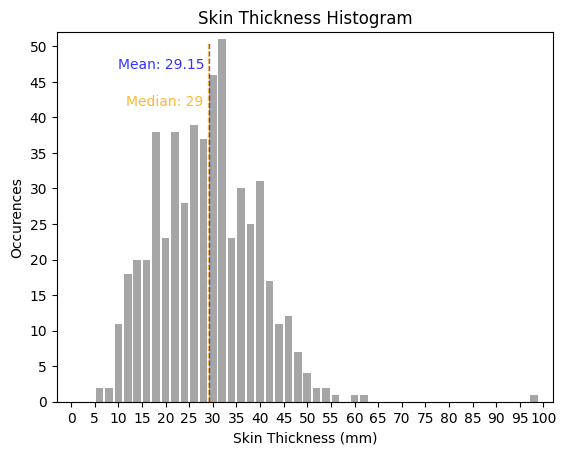

In [129]:
# filter out rows where skin thickness is 0
diabetes_filtered_skin_thickness = diabetes[diabetes['Skin Thickness'] != 0]

# get minimum and maximum skin thickness
min_skin_thickness = diabetes_filtered_skin_thickness['Skin Thickness'].min()
max_skin_thickness = diabetes_filtered_skin_thickness['Skin Thickness'].max()
print('Min Skin Thickness: {:.0f} mm'.format(min_skin_thickness))
print('Max Skin Thickness: {:.0f} mm'.format(max_skin_thickness))

# calculate average skin thickness
average_skin_thickness = diabetes_filtered_skin_thickness['Skin Thickness'].mean()
median_skin_thickness = diabetes_filtered_skin_thickness['Skin Thickness'].median()

# calculate standard deviation
std_skin_thickness = diabetes_filtered_skin_thickness['Skin Thickness'].std()
print('Standard Deviation: {:.2f} mm'.format(std_skin_thickness))

# show histogram of skin thickness
counts, bins, patches = plt.hist(diabetes_filtered_skin_thickness['Skin Thickness'], bins=range(0, max_skin_thickness + 2, 2), align='left', rwidth=0.8, color='gray', alpha=0.7)
plt.xticks(range(0, max_skin_thickness + 2, 5))
plt.xlim([0 - 3, max_skin_thickness + 3])
plt.ylim([0, counts.max() + 1])
plt.locator_params(axis='y', nbins=20)

# show mean on histogram
plt.vlines(average_skin_thickness, 0, plt.ylim()[1] * 0.97, colors='blue', linestyles='dashed', linewidth=1, alpha=0.7)
plt.text(average_skin_thickness - 1, plt.ylim()[1] * 0.9, 'Mean: {:.2f}'.format(average_skin_thickness), color='blue', alpha=0.8, ha='right')

# show median on histogram
plt.vlines(median_skin_thickness, 0, plt.ylim()[1] * 0.97, colors='orange', linestyles='dashed', linewidth=1, alpha=0.7)
plt.text(median_skin_thickness - 1, plt.ylim()[1] * 0.8, 'Median: {:.0f}'.format(median_skin_thickness), color='orange', alpha=0.8, ha='right')

plt.title('Skin Thickness Histogram')
plt.xlabel('Skin Thickness (mm)')
plt.ylabel('Occurences')
plt.show()

## Insulin

Insulin level classification taken from:
* https://pharmeasy.in/diagnostics/tests/insulin-pp-162
* https://emedicine.medscape.com/article/2089224-overview?form=fpf

Min Insulin Level: 1 μU/ml
Max Insulin Level: 846 μU/ml
Standard Deviation: 118.88 μU/ml


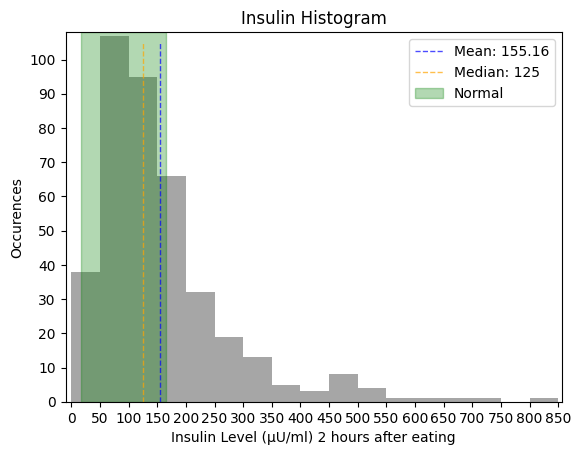

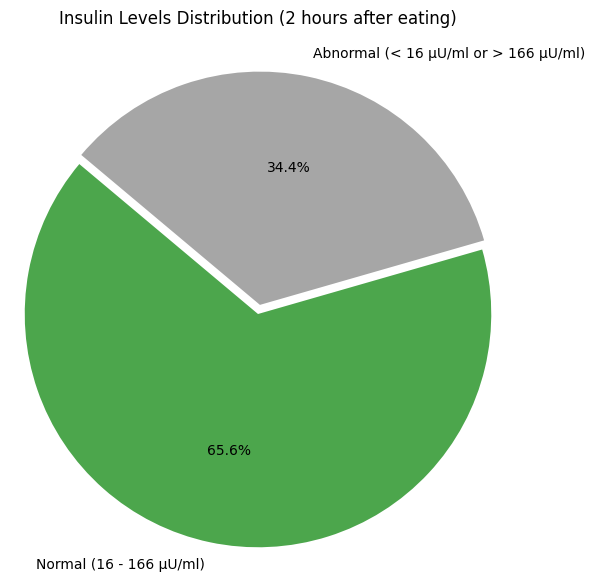

In [130]:
# filter out rows where insulin is 0
diabetes_filtered_insulin = diabetes[diabetes['Insulin'] != 0]

# get minimum and maximum insulin
min_insulin = diabetes_filtered_insulin['Insulin'].min()
max_insulin = diabetes_filtered_insulin['Insulin'].max()
print('Min Insulin Level: {:.0f} μU/ml'.format(min_insulin))
print('Max Insulin Level: {:.0f} μU/ml'.format(max_insulin))

# calculate average insulin
average_insulin = diabetes_filtered_insulin['Insulin'].mean()
median_insulin = diabetes_filtered_insulin['Insulin'].median()

# calculate standard deviation
std_insulin = diabetes_filtered_insulin['Insulin'].std()
print('Standard Deviation: {:.2f} μU/ml'.format(std_insulin))

# calculate number of bins
num_bins = int(np.sqrt(len(diabetes_filtered_insulin)))

# show histogram of insulin
counts, bins, patches = plt.hist(diabetes_filtered_insulin['Insulin'], bins=range(0, max_insulin + 50, 50), color='gray', alpha=0.7)
plt.xticks(range(0, max_insulin + 50, 50))
plt.xlim([0 - 10, max_insulin + 10])
plt.ylim([0, counts.max() + 1])
plt.locator_params(axis='y', nbins=20)

# show mean on histogram
plt.vlines(average_insulin, 0, plt.ylim()[1] * 0.97, colors='blue', linestyles='dashed', linewidth=1, alpha=0.7)

# show median on histogram
plt.vlines(median_insulin, 0, plt.ylim()[1] * 0.97, colors='orange', linestyles='dashed', linewidth=1, alpha=0.7)

# insulin level range (2 hours after eating)
normal_lower_bound = 16
normal_upper_bound = 166

# show the range on the histogram
plt.fill_betweenx([0, plt.ylim()[1]], normal_lower_bound, normal_upper_bound, color='green', alpha=0.3)
plt.legend(['Mean: ' + "{:.2f}".format(average_insulin), 'Median: ' + "{:.0f}".format(median_insulin), 'Normal'], loc='upper right')

plt.title('Insulin Histogram')
plt.xlabel('Insulin Level (μU/ml) 2 hours after eating')
plt.ylabel('Occurences')
plt.show()

# show piechart of insulin level
normal = diabetes_filtered_insulin[(diabetes_filtered_insulin['Insulin'] >= normal_lower_bound) & (diabetes_filtered_insulin['Insulin'] < normal_upper_bound)].shape[0]
abnormal = diabetes_filtered_insulin.shape[0] - normal
labels = ['Normal ({} - {} μU/ml)'.format(normal_lower_bound, normal_upper_bound), 'Abnormal (< {} μU/ml or > {} μU/ml)'.format(normal_lower_bound, normal_upper_bound)]
sizes = [normal, abnormal]
colors = [mcolors.to_rgba('green', alpha=0.7), mcolors.to_rgba('gray', alpha=0.7)]
explode = (0.02, 0.02)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Insulin Levels Distribution (2 hours after eating)', y=1.03)
plt.subplots_adjust(top=1.2)
plt.show()

## BMI
BMI level classification taken from:
* https://www.cdc.gov/obesity/basics/adult-defining.html
* https://www.researchgate.net/figure/International-classification-of-adult-underweight-overweight-and-obesity-according-to_tbl5_323009432

Min BMI: 18.20 kg/m^2
Max BMI: 67.10 kg/m^2
Standard Deviation: 6.92 kg/m^2


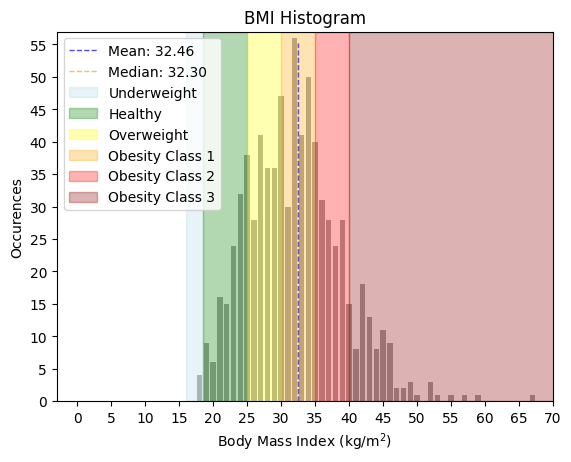

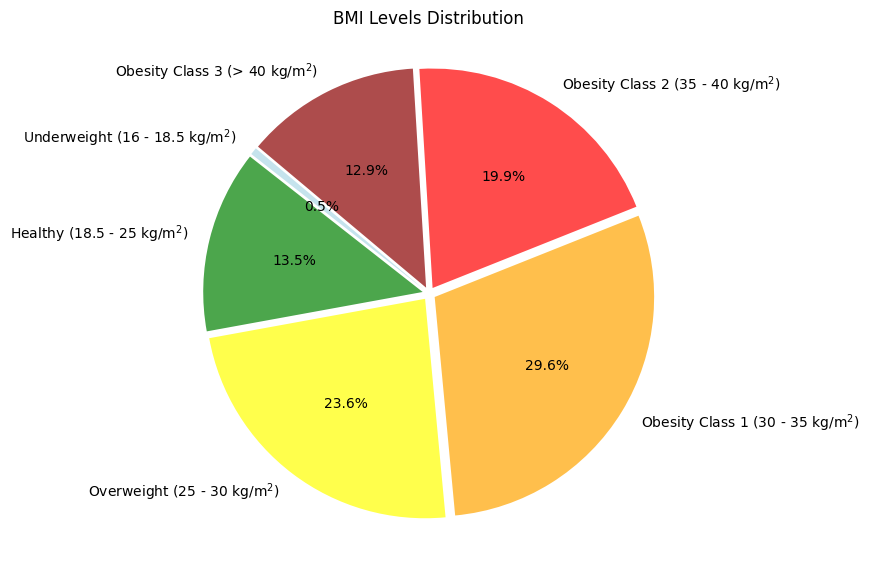

In [131]:
# filter out rows where BMI is 0
diabetes_filtered_bmi = diabetes[diabetes['BMI'] != 0]

# get minimum and maximum BMI
min_bmi = diabetes_filtered_bmi['BMI'].min()
max_bmi = diabetes_filtered_bmi['BMI'].max()
print('Min BMI: {:.2f} kg/m^2'.format(min_bmi))
print('Max BMI: {:.2f} kg/m^2'.format(max_bmi))

# calculate average BMI
average_bmi = diabetes_filtered_bmi['BMI'].mean()
median_bmi = diabetes_filtered_bmi['BMI'].median()

# calculate standard deviation
std_bmi = diabetes_filtered_bmi['BMI'].std()
print('Standard Deviation: {:.2f} kg/m^2'.format(std_bmi))

# define BMI levels
underweight_lower_bound = 16
underweight_upper_bound = 18.5
healthy_lower_bound = 18.5
healthy_upper_bound = 25
overweight_lower_bound = 25
overweight_upper_bound = 30
obesity_class1_lower_bound = 30
obesity_class1_upper_bound = 35
obesity_class2_lower_bound = 35
obesity_class2_upper_bound = 40
obesity_class3_lower_bound = 40

# show histogram of BMI
counts, bins, patches = plt.hist(diabetes_filtered_bmi['BMI'], bins=range(0, int(max_bmi) + 2), align='left', rwidth=0.8, color='gray', alpha=0.7)
plt.xticks(range(0, int(max_bmi) + 5, 5))
plt.xlim([0 - 3, int(max_bmi) + 3])
plt.ylim([0, counts.max() + 1])
plt.locator_params(axis='y', nbins=20)

# show mean on histogram
plt.vlines(average_bmi, 0, plt.ylim()[1] * 0.97, colors='blue', linestyles='dashed', linewidth=1, alpha=0.7)

# show median on histogram
plt.vlines(median_bmi, 0, plt.ylim()[1] * 0.97, colors='orange', linestyles='dashed', linewidth=1, alpha=0.7)

# show the ranges on the histogram
plt.fill_betweenx([0, plt.ylim()[1]], underweight_lower_bound, underweight_upper_bound, color='lightblue', alpha=0.3)
plt.fill_betweenx([0, plt.ylim()[1]], healthy_lower_bound, healthy_upper_bound, color='green', alpha=0.3)
plt.fill_betweenx([0, plt.ylim()[1]], overweight_lower_bound, overweight_upper_bound, color='yellow', alpha=0.3)
plt.fill_betweenx([0, plt.ylim()[1]], obesity_class1_lower_bound, obesity_class1_upper_bound, color='orange', alpha=0.3)
plt.fill_betweenx([0, plt.ylim()[1]], obesity_class2_lower_bound, obesity_class2_upper_bound, color='red', alpha=0.3)
plt.fill_betweenx([0, plt.ylim()[1]], obesity_class3_lower_bound, 100, color='darkred', alpha=0.3)
plt.legend(['Mean: ' + "{:.2f}".format(average_bmi), 'Median: ' + "{:.2f}".format(median_bmi), 'Underweight', 'Healthy', 'Overweight', 'Obesity Class 1', 'Obesity Class 2', 'Obesity Class 3'], loc='upper left')

plt.title('BMI Histogram')
plt.xlabel('Body Mass Index (kg/m$^2$)')
plt.ylabel('Occurences')
plt.show()

# count the number of people in each BMI level
underweight = len(diabetes_filtered_bmi[diabetes_filtered_bmi['BMI'] < underweight_upper_bound])
healthy = len(diabetes_filtered_bmi[(diabetes_filtered_bmi['BMI'] >= underweight_upper_bound) & (diabetes_filtered_bmi['BMI'] < healthy_upper_bound)])
overweight = len(diabetes_filtered_bmi[(diabetes_filtered_bmi['BMI'] >= healthy_upper_bound) & (diabetes_filtered_bmi['BMI'] < overweight_upper_bound)])
obesity_class1 = len(diabetes_filtered_bmi[(diabetes_filtered_bmi['BMI'] >= overweight_upper_bound) & (diabetes_filtered_bmi['BMI'] < obesity_class1_upper_bound)])
obesity_class2 = len(diabetes_filtered_bmi[(diabetes_filtered_bmi['BMI'] >= obesity_class1_upper_bound) & (diabetes_filtered_bmi['BMI'] < obesity_class2_upper_bound)])
obesity_class3 = len(diabetes_filtered_bmi[diabetes_filtered_bmi['BMI'] >= obesity_class2_upper_bound])

# BMI pie chart
labels = ['Underweight ({} - {} kg/m$^2$)'.format(16, underweight_upper_bound), 
          'Healthy ({} - {} kg/m$^2$)'.format(healthy_lower_bound, healthy_upper_bound), 
          'Overweight ({} - {} kg/m$^2$)'.format(overweight_lower_bound, overweight_upper_bound), 
          'Obesity Class 1 ({} - {} kg/m$^2$)'.format(obesity_class1_lower_bound, obesity_class1_upper_bound), 
          'Obesity Class 2 ({} - {} kg/m$^2$)'.format(obesity_class2_lower_bound, obesity_class2_upper_bound), 
          'Obesity Class 3 (> {} kg/m$^2$)'.format(obesity_class3_lower_bound)]
sizes = [underweight, healthy, overweight, obesity_class1, obesity_class2, obesity_class3]
colors = [mcolors.to_rgba('lightblue', alpha=0.7), mcolors.to_rgba('green', alpha=0.7), mcolors.to_rgba('yellow', alpha=0.7), mcolors.to_rgba('orange', alpha=0.7), mcolors.to_rgba('red', alpha=0.7), mcolors.to_rgba('darkred', alpha=0.7)]
explode = (0.03, 0.03, 0.03, 0.03, 0.03, 0.03)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('BMI Levels Distribution')
plt.subplots_adjust(top=1.2)
plt.show()

## Diabetes Pedigree Function

Min Diabetes Pedigree Function: 0.078
Max Diabetes Pedigree Function: 2.420
Standard Deviation: 0.331


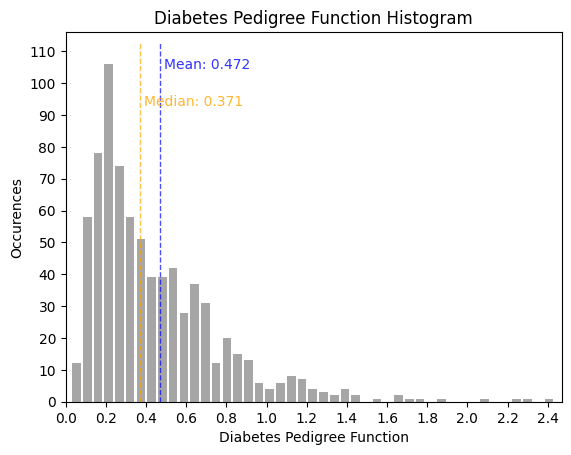

In [132]:
# get minimum and maximum Diabetes Pedigree Function
min_diabetes_pedigree_function = diabetes['Diabetes Pedigree Function'].min()
max_diabetes_pedigree_function = diabetes['Diabetes Pedigree Function'].max()
print('Min Diabetes Pedigree Function: {:.3f}'.format(min_diabetes_pedigree_function))
print('Max Diabetes Pedigree Function: {:.3f}'.format(max_diabetes_pedigree_function))

# calculate mean and median DPF
average_diabetes_pedigree_function = diabetes['Diabetes Pedigree Function'].mean()
median_diabetes_pedigree_function = diabetes['Diabetes Pedigree Function'].median()

# calculate standard deviation
std_diabetes_pedigree_function = diabetes['Diabetes Pedigree Function'].std()
print('Standard Deviation: {:.3f}'.format(std_diabetes_pedigree_function))

# show histogram of DPF
bins = np.linspace(0, max_diabetes_pedigree_function + 0.2, num=50)
counts, bins, patches = plt.hist(diabetes['Diabetes Pedigree Function'], bins=bins, align='left', rwidth=0.8, color='gray', alpha=0.7)
plt.xticks(np.arange(0, max_diabetes_pedigree_function + 0.2, step=0.2))
plt.xlim([0, max_diabetes_pedigree_function + 0.05])
plt.ylim([0, counts.max() + 10])
plt.locator_params(axis='y', nbins=20)

# show mean on histogram
plt.vlines(average_diabetes_pedigree_function, 0, plt.ylim()[1] * 0.97, colors='blue', linestyles='dashed', linewidth=1, alpha=0.7)
plt.text(average_diabetes_pedigree_function + 0.02, plt.ylim()[1] * 0.9, 'Mean: {:.3f}'.format(average_diabetes_pedigree_function), color='blue', alpha=0.8)

# show median on histogram
plt.vlines(median_diabetes_pedigree_function, 0, plt.ylim()[1] * 0.97, colors='orange', linestyles='dashed', linewidth=1, alpha=0.7)
plt.text(median_diabetes_pedigree_function + 0.02, plt.ylim()[1] * 0.8, 'Median: {:.3f}'.format(median_diabetes_pedigree_function), color='orange', alpha=0.8)

plt.title('Diabetes Pedigree Function Histogram')
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('Occurences')
plt.show()

## Outcome

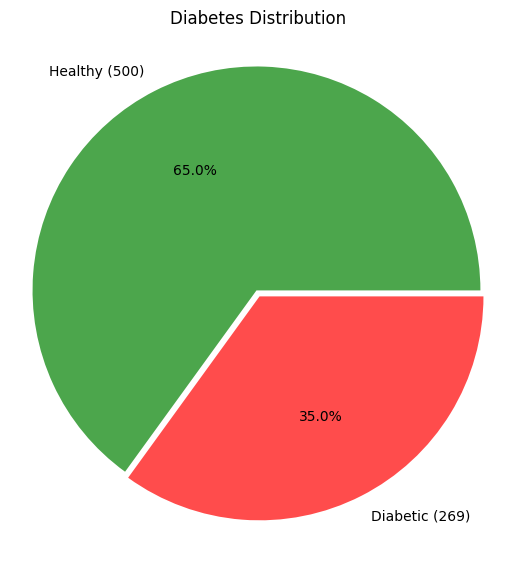

In [133]:
# pie chart of outcome
outcomes = diabetes['Outcome'].value_counts()
explode = (0.03, 0)
colors = [mcolors.to_rgba('green', alpha=0.7), mcolors.to_rgba('red', alpha=0.7)]  # named colors with alpha = 0.6
labels = ['Healthy ({})'.format(outcomes[0]), 'Diabetic ({})'.format(outcomes[1])]
plt.pie(outcomes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors)
plt.axis('equal')
plt.title('Diabetes Distribution')
plt.subplots_adjust(top=1.2)
plt.show()

# Data Preparation

In [134]:
# calculate skewness
glucose_skewness = diabetes['Glucose'].skew()
blood_pressure_skewness = diabetes['Blood Pressure'].skew()
skin_thickness_skewness = diabetes['Skin Thickness'].skew()
insulin_skewness = diabetes['Insulin'].skew()
bmi_skewness = diabetes['BMI'].skew()

print("Skewness of Glucose: ", glucose_skewness)
print("Skewness of Blood Pressure: ", blood_pressure_skewness)
print("Skewness of Skin Thickness: ", skin_thickness_skewness)
print("Skewness of Insulin: ", insulin_skewness)
print("Skewness of BMI: ", bmi_skewness)

Skewness of Glucose:  0.1736073059169866
Skewness of Blood Pressure:  -1.8457113705210613
Skewness of Skin Thickness:  0.1113414928773122
Skewness of Insulin:  2.2739068363018333
Skewness of BMI:  -0.4309342731686968


In [135]:
# substitute 0 values with nan
diabetes['Glucose'] = diabetes['Glucose'].replace(0, np.nan)
diabetes['Blood Pressure'] = diabetes['Blood Pressure'].replace(0, np.nan)
diabetes['Skin Thickness'] = diabetes['Skin Thickness'].replace(0, np.nan)
diabetes['Insulin'] = diabetes['Insulin'].replace(0, np.nan)
diabetes['BMI'] = diabetes['BMI'].replace(0, np.nan)

# substitute nan values with mean or median depending on skewness
if glucose_skewness > 0.5 or glucose_skewness < -0.5:
    diabetes['Glucose'].fillna(median_glucose, inplace = True)
else:
    diabetes['Glucose'].fillna(average_glucose, inplace = True)

if blood_pressure_skewness > 0.5 or blood_pressure_skewness < -0.5:
    diabetes['Blood Pressure'].fillna(median_blood_pressure, inplace = True)
else:
    diabetes['Blood Pressure'].fillna(average_blood_pressure, inplace = True)

if skin_thickness_skewness > 0.5 or skin_thickness_skewness < -0.5:
    diabetes['Skin Thickness'].fillna(median_skin_thickness, inplace = True)
else:
    diabetes['Skin Thickness'].fillna(average_skin_thickness, inplace = True)

if insulin_skewness > 0.5 or insulin_skewness < -0.5:
    diabetes['Insulin'].fillna(median_insulin, inplace = True)
else:
    diabetes['Insulin'].fillna(average_insulin, inplace = True)

if bmi_skewness > 0.5 or bmi_skewness < -0.5:
    diabetes['BMI'].fillna(median_bmi, inplace = True)
else:
    diabetes['BMI'].fillna(average_bmi, inplace = True)

# Correlation Analysis

## Pair Plots

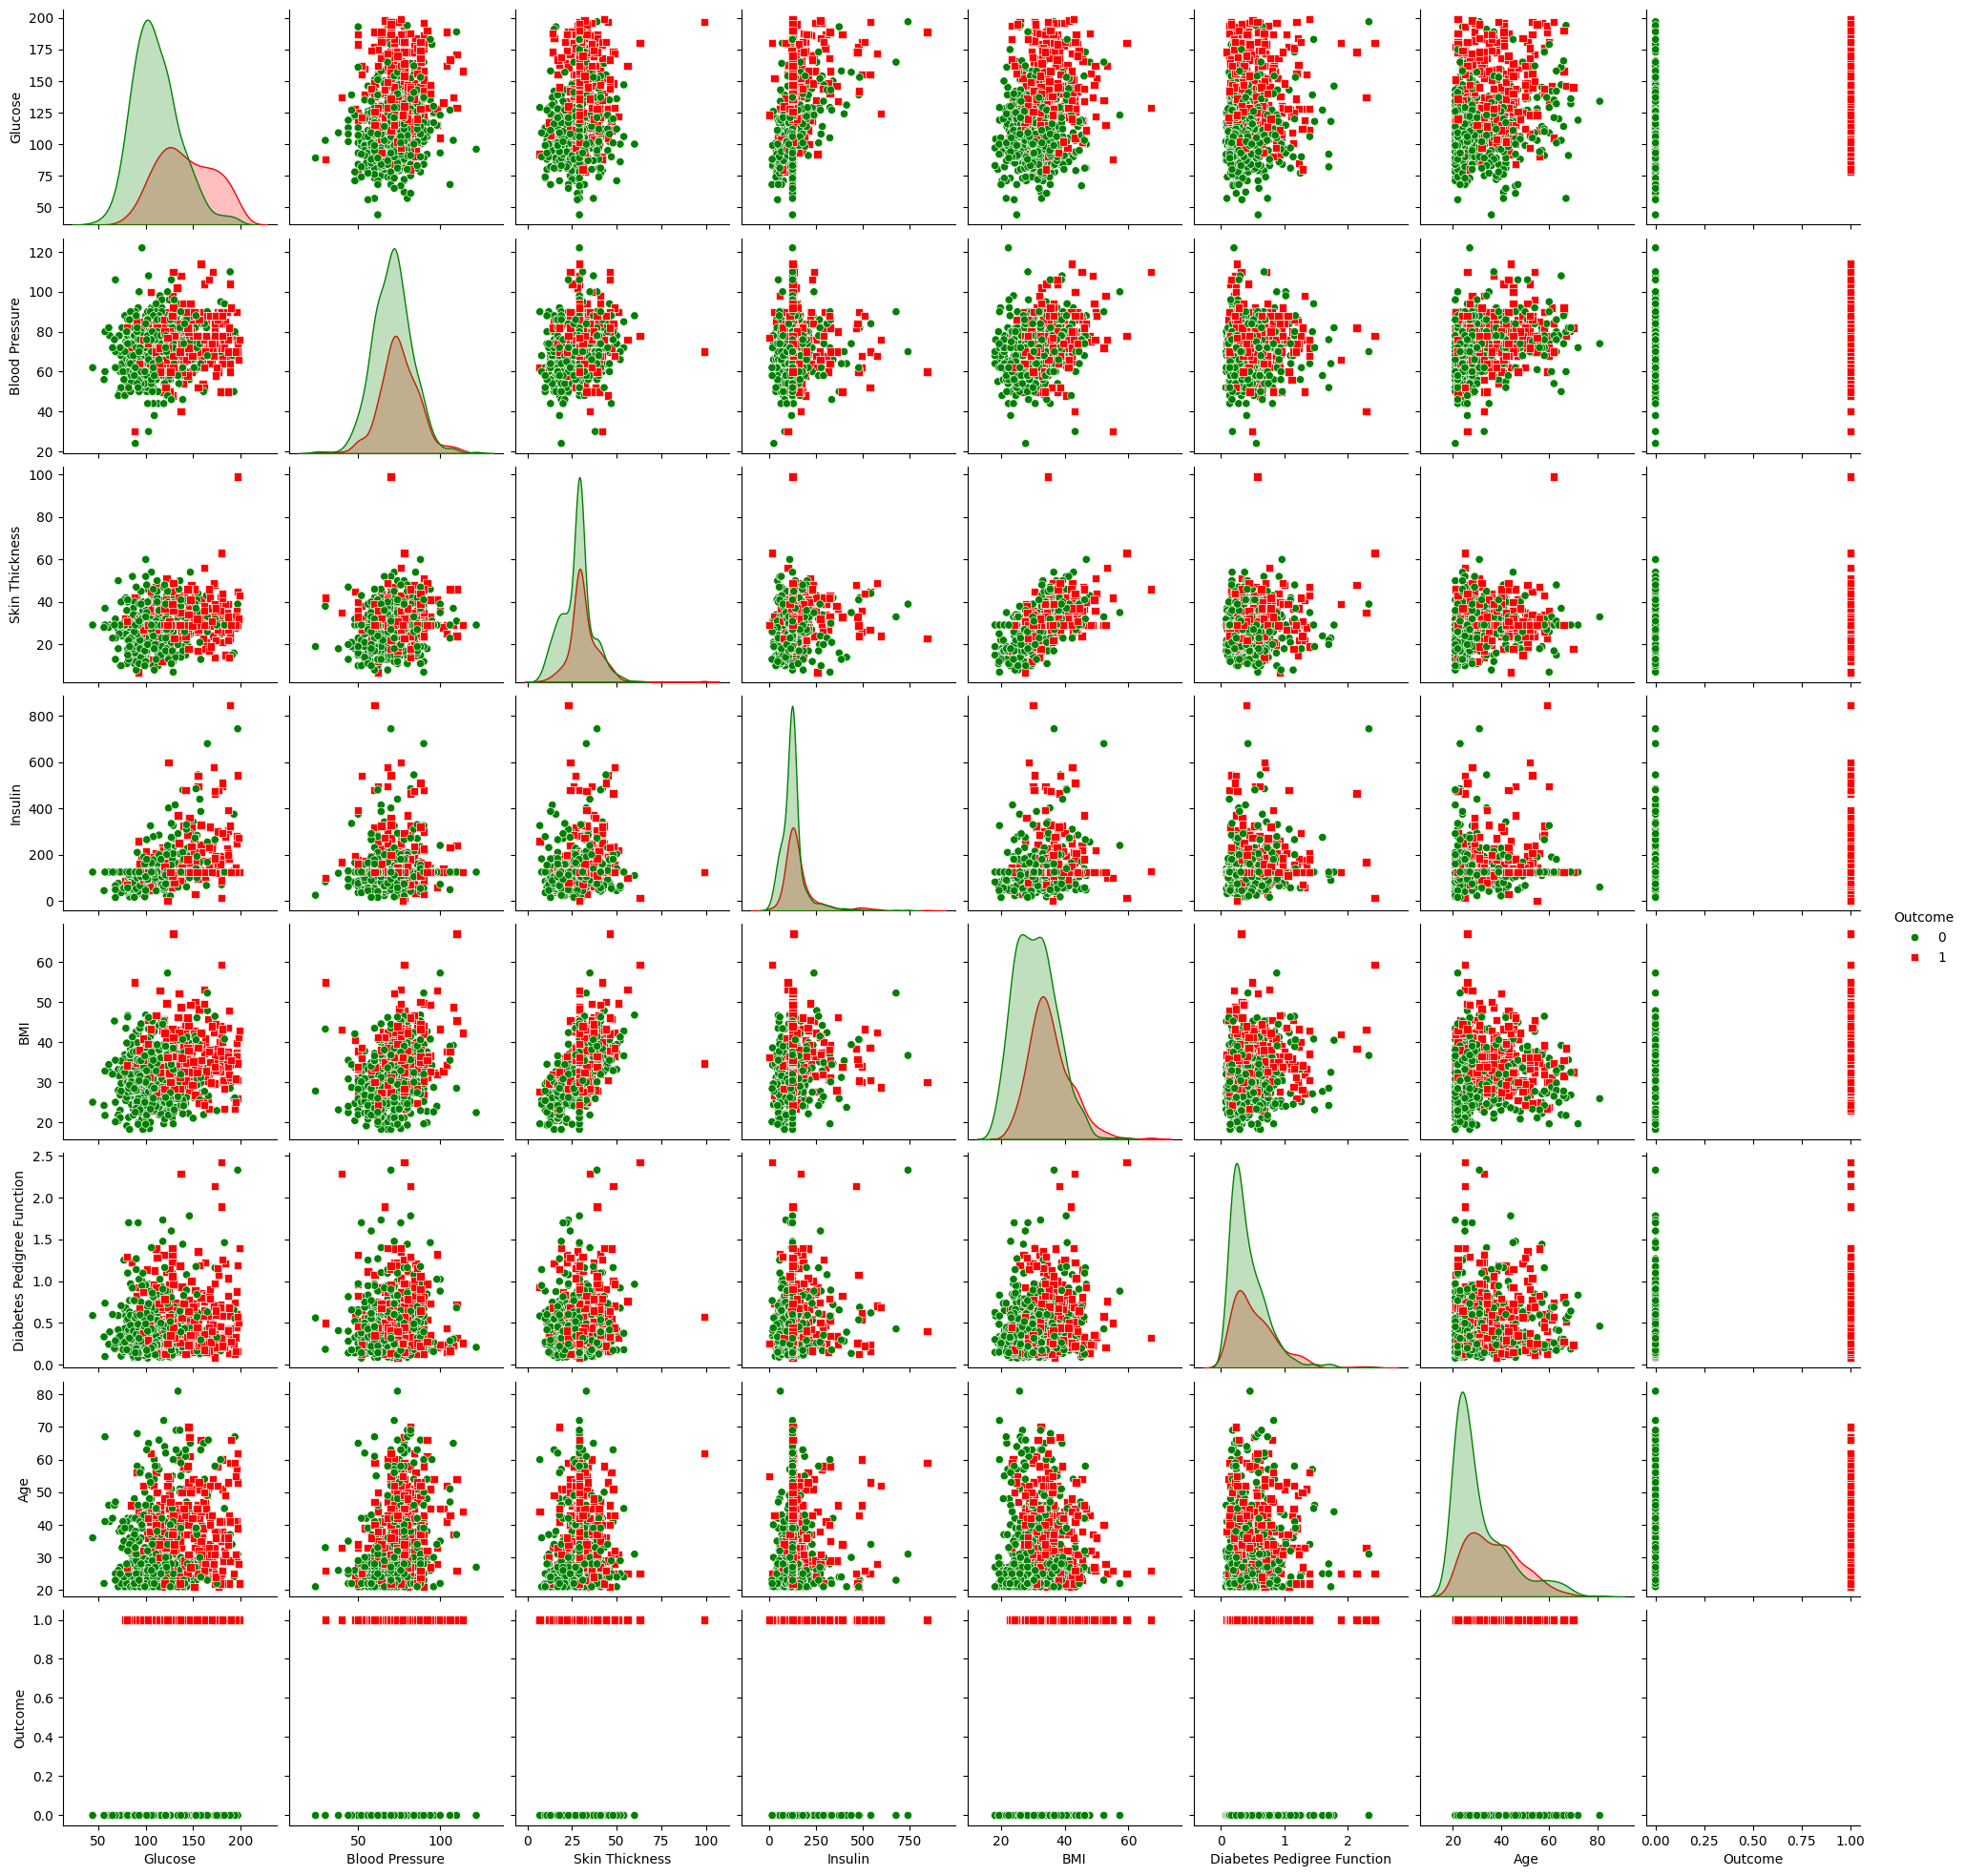

In [136]:
# pair plot of all features
pair_plots = sns.pairplot(diabetes, hue='Outcome', vars=['Glucose', 'Blood Pressure', 'Skin Thickness', 'Insulin', 'BMI', 'Diabetes Pedigree Function', 'Age', 'Outcome'], markers=["o", "s"], palette={0: "g", 1: "r"})

## Correlation Matrix

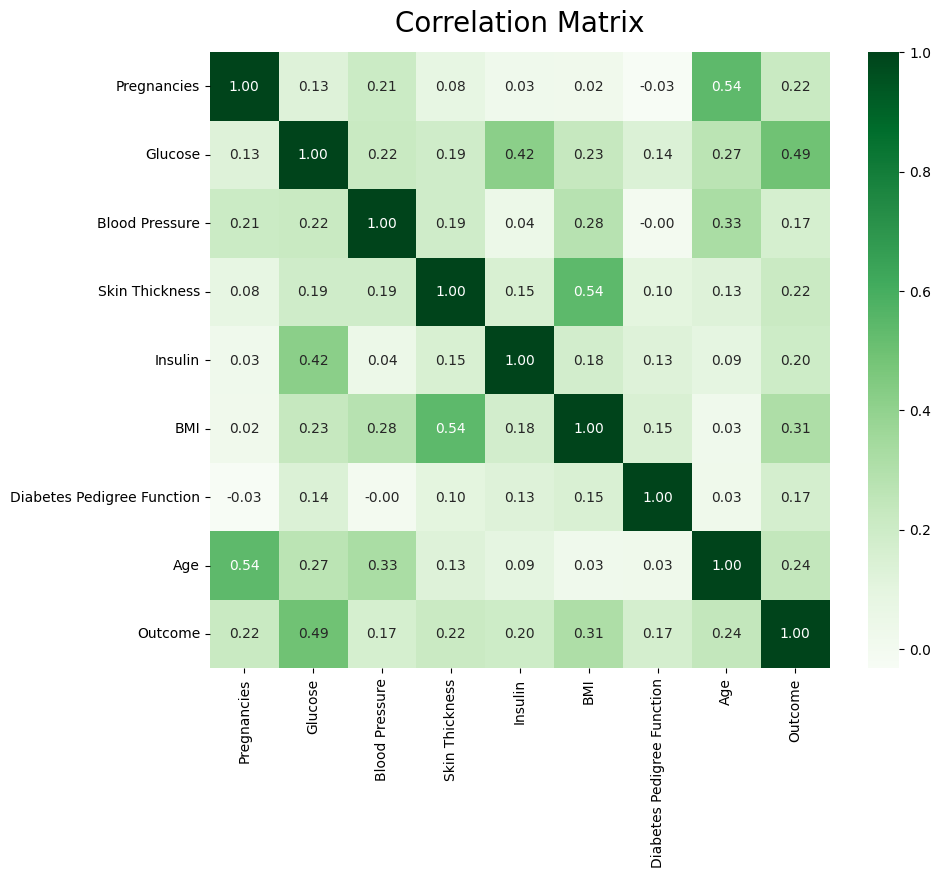

Glucose                       0.492407
BMI                           0.312472
Age                           0.240816
Pregnancies                   0.219418
Skin Thickness                0.215039
Insulin                       0.200333
Diabetes Pedigree Function    0.172406
Blood Pressure                0.166184
Name: Outcome, dtype: float64


In [137]:
# correlation matrix of features
correlation_matrix = diabetes.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f")
plt.title('Correlation Matrix', fontsize=20, y=1.02)
plt.show()

# sort features by correlation with outcome, and make list
correlation_importance_list = correlation_matrix['Outcome'].sort_values(ascending=False)
correlation_importance_list = correlation_importance_list.drop('Outcome')
correlation_importance_list = correlation_importance_list.abs().sort_values(ascending=False)
print(correlation_importance_list)
features = correlation_importance_list.index.tolist()

# Prediction Model

## SVC (Support Vector Classifier)

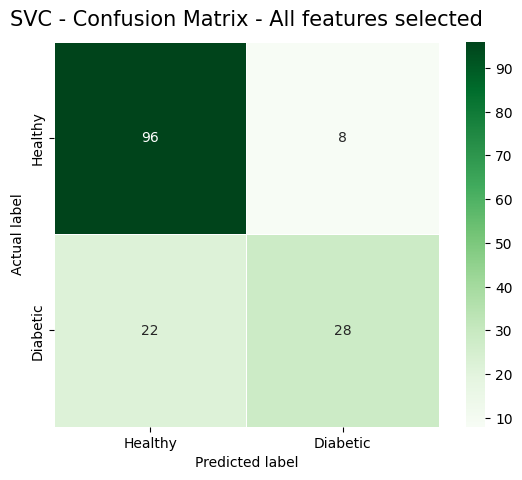

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       104
           1       0.78      0.56      0.65        50

    accuracy                           0.81       154
   macro avg       0.80      0.74      0.76       154
weighted avg       0.80      0.81      0.80       154



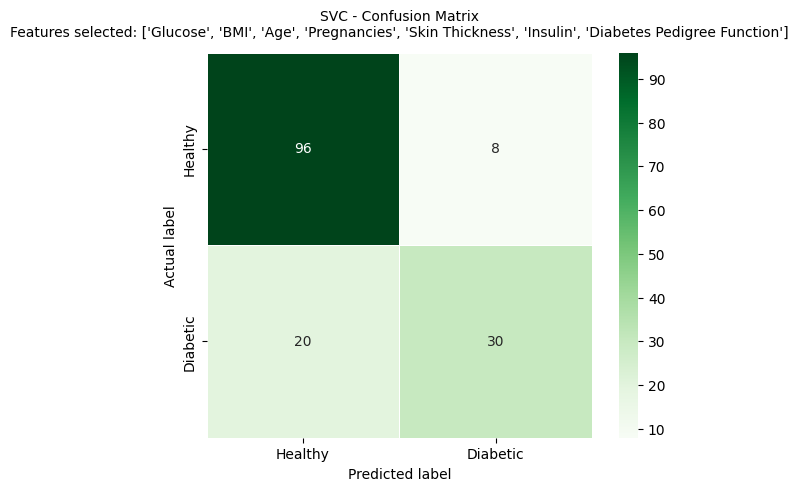

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       104
           1       0.79      0.60      0.68        50

    accuracy                           0.82       154
   macro avg       0.81      0.76      0.78       154
weighted avg       0.82      0.82      0.81       154



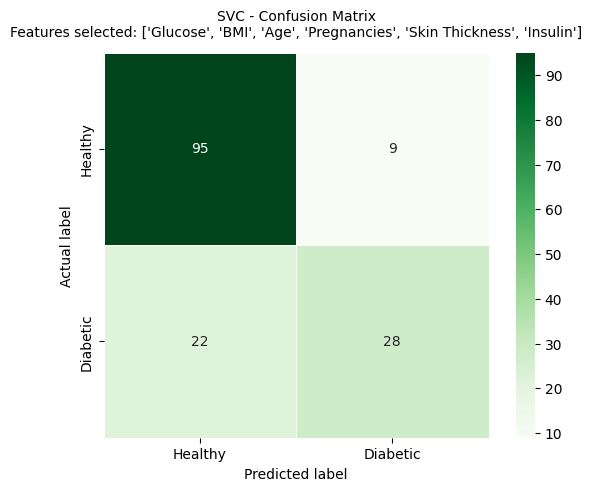

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       104
           1       0.76      0.56      0.64        50

    accuracy                           0.80       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.79      0.80      0.79       154



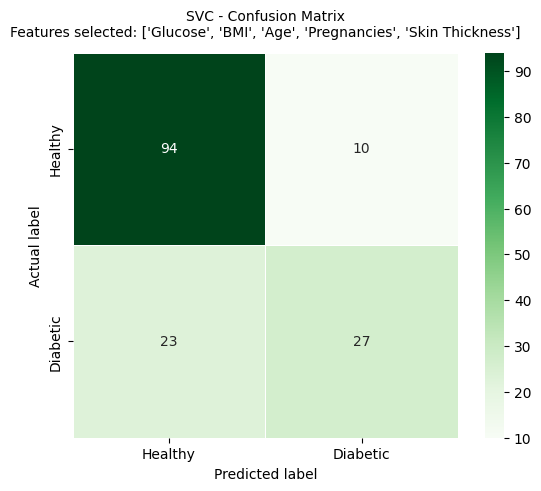

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       104
           1       0.73      0.54      0.62        50

    accuracy                           0.79       154
   macro avg       0.77      0.72      0.74       154
weighted avg       0.78      0.79      0.78       154



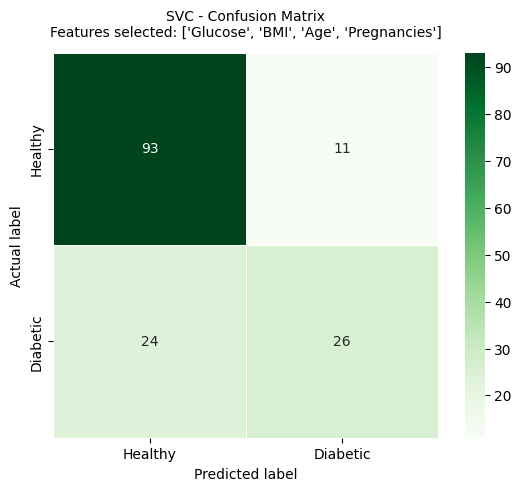

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       104
           1       0.70      0.52      0.60        50

    accuracy                           0.77       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.76      0.77      0.76       154



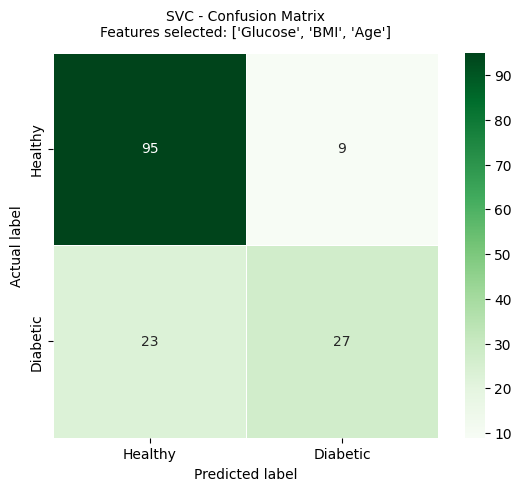

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       104
           1       0.75      0.54      0.63        50

    accuracy                           0.79       154
   macro avg       0.78      0.73      0.74       154
weighted avg       0.79      0.79      0.78       154



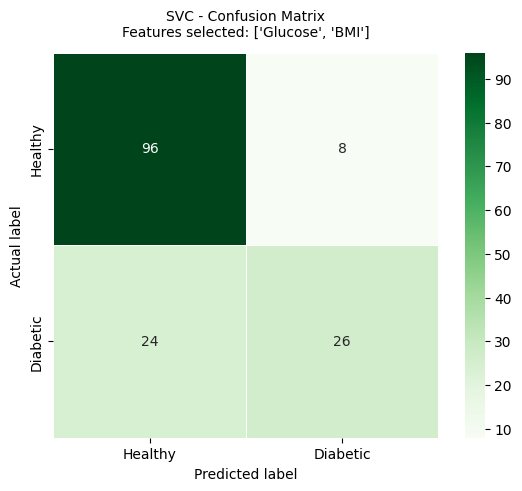

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       104
           1       0.76      0.52      0.62        50

    accuracy                           0.79       154
   macro avg       0.78      0.72      0.74       154
weighted avg       0.79      0.79      0.78       154



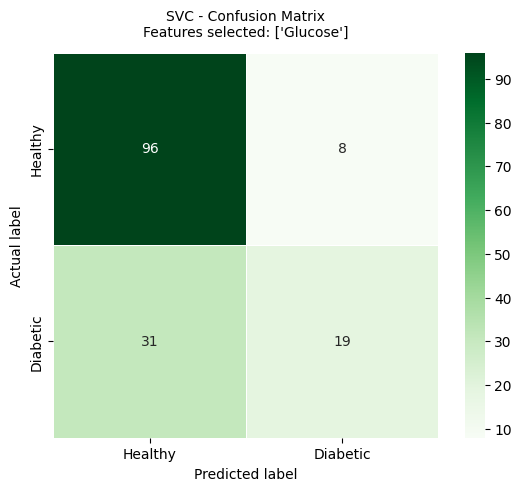

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       104
           1       0.70      0.38      0.49        50

    accuracy                           0.75       154
   macro avg       0.73      0.65      0.66       154
weighted avg       0.74      0.75      0.72       154



In [138]:
# list to store accuracy scores
accuracy_scores = []

# scaler object for normalization
scaler = MinMaxScaler()

# SVM prediction model, all features selected
X = diabetes.drop('Outcome', axis=1)
X = scaler.fit_transform(X)
y = diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

model = SVC()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy_scores.append(accuracy_score(y_test, predictions))

# confusion matrix
cm = confusion_matrix(y_test, predictions)

# confusion matrix heatmap
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Greens', 
            xticklabels=['Healthy', 'Diabetic'], yticklabels=['Healthy', 'Diabetic'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('SVC - Confusion Matrix - All features selected', size = 15, y = 1.02)
plt.show()

print(classification_report(y_test, predictions))

# SVM prediction model, iterative feature selection
# removing feature with the lowest correlation with outcome each loop
size = 70
cnt = len(features) - 1
for i in range(cnt):
    features.pop()
    X = diabetes[features]
    X = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

    model = SVC()
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, predictions))

    # confusion matrix
    cm = confusion_matrix(y_test, predictions)

    # confusion matrix heatmap
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Greens', 
                xticklabels=['Healthy', 'Diabetic'], yticklabels=['Healthy', 'Diabetic'])
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title('SVC - Confusion Matrix\nFeatures selected: {}'.format(features), size = size/len(features), y=1.02)
    size = size - 10
    plt.show()

    print(classification_report(y_test, predictions))

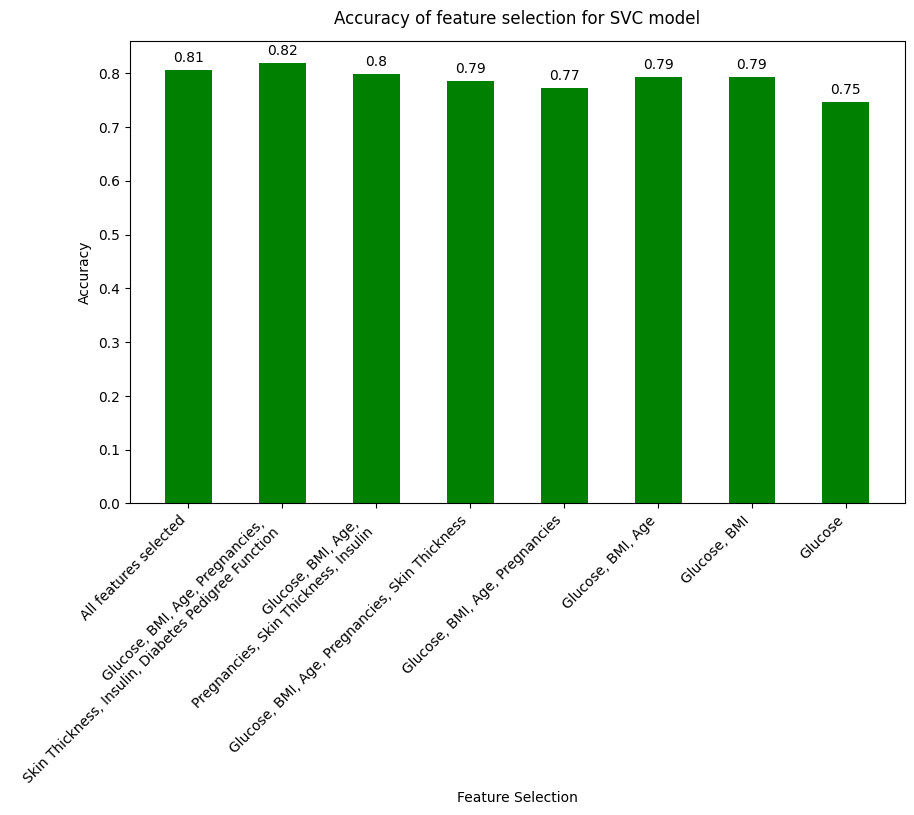

In [139]:
# model with the highest accuracy
best_model_index = accuracy_scores.index(max(accuracy_scores))
model_names = ['All features selected', 'Glucose, BMI, Age, Pregnancies, \nSkin Thickness, Insulin, Diabetes Pedigree Function', 'Glucose, BMI, Age, \nPregnancies, Skin Thickness, Insulin', 'Glucose, BMI, Age, Pregnancies, Skin Thickness', 'Glucose, BMI, Age, Pregnancies', 'Glucose, BMI, Age', 'Glucose, BMI', 'Glucose']
best_model = model_names[best_model_index]

# plot of accuracy over feature selection
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy_scores, color='green', width=0.5)
plt.xlabel('Feature Selection')
plt.ylabel('Accuracy')
plt.title('Accuracy of feature selection for SVC model', y=1.02)
plt.xticks(rotation=45, ha='right')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.show()

## ROC (Receiver Operating Characteristic) Curve

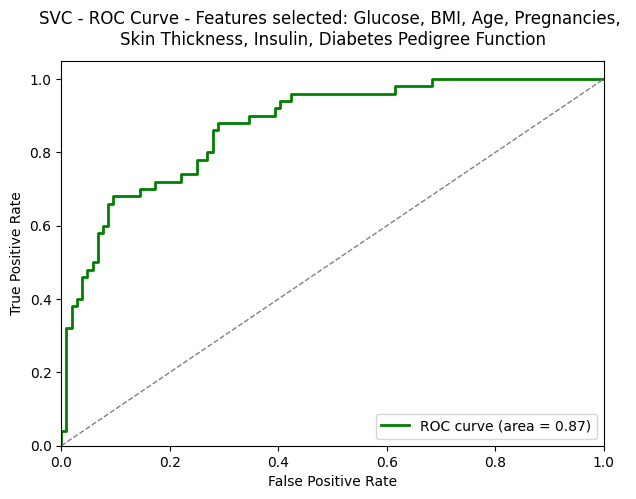

In [140]:
# ROC curve for the best model
X = diabetes[['Glucose', 'BMI', 'Age', 'Pregnancies', 'Skin Thickness', 'Insulin', 'Diabetes Pedigree Function']]
X = scaler.fit_transform(X)
y = diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

model = SVC(probability=True)
model.fit(X_train, y_train)

predictions = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC - ROC Curve - Features selected: ' + best_model, y=1.02)
plt.legend(loc="lower right")
plt.show()

## Dummy Classifier Check

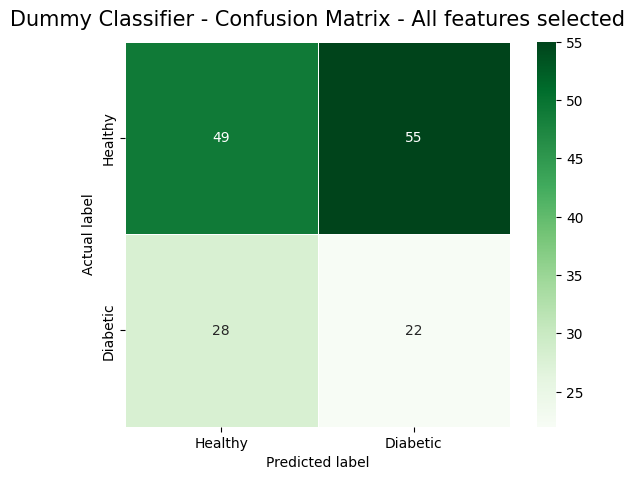

              precision    recall  f1-score   support

           0       0.64      0.47      0.54       104
           1       0.29      0.44      0.35        50

    accuracy                           0.46       154
   macro avg       0.46      0.46      0.44       154
weighted avg       0.52      0.46      0.48       154



In [141]:
# dummy classifier model
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

model = DummyClassifier(strategy='uniform')
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy_scores.append(accuracy_score(y_test, predictions))

# confusion matrix
cm = confusion_matrix(y_test, predictions)

# confusion matrix heatmap
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Greens',
            xticklabels=['Healthy', 'Diabetic'], yticklabels=['Healthy', 'Diabetic'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Dummy Classifier - Confusion Matrix - All features selected', size = 15, y = 1.02)
plt.show()

print(classification_report(y_test, predictions))